In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def generate_examples(num=1000):
    W =[1.0, -3.0]
    b = 1.0

    W = np.reshape(W,(2,1))
    x = np.random.randn(num, 2)
    y = b + np.dot(x, W) + np.random.randn(num, 1)
    y = np.reshape(y, (num,1))
    return x, y

In [ ]:
x, y = generate_examples()

In [ ]:
print(x.shape, y.shape)

(1000, 2) (1000, 1)


In [ ]:
print(x[0], y[0])

[0.17605799 0.83593006] [-1.01051934]


In [ ]:
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features,1)
        self.b = np.random.randn()

In [ ]:
model = Model(2)
print(model.W)
print(model.b)

[[ 0.76031164]
 [-0.41238952]]
1.4834374147085743


In [ ]:
class Model(Model):
    def forward_pass(self, x):
        y_hat = self.b + np.dot(x, self.W)
        return y_hat

    def compute_loss(self, y_hat, y_true):
        m = y_hat.shape[0]
        return np.sum((y_hat - y_true)**2) / (2*m)

In [ ]:
y_hat = Model(2).forward_pass(x)
print(y_hat.shape, y_hat[0])

(1000, 1) [-0.21846579]


In [ ]:
def compute_loss(self, y_hat, y_true):
    m = y_hat.shape[0]
    return np.sum((y_hat - y_true)**2) / (2*m)


In [ ]:
model = Model(2)
y_hat= model.forward_pass(x)
loss = model.compute_loss(y_hat, y)

In [ ]:
loss

np.float64(8.226347420507038)

In [ ]:
class Model(Model):
    def backward_pass(self, x, y_true, y_hat):
        m = y_true.shape[0]
        db = 1/m*np.sum(y_hat-y_true)
        dW = (1/m)*np.sum(np.dot(np.transpose(y_hat-y_true), x), axis=0)
        return dW, db

In [ ]:
model = Model(2)
x, y = generate_examples()
y_hat = model.forward_pass(x)
dW, db = model.backward_pass(x, y, y_hat)

In [ ]:
print(dW, db)

[-2.5588714  2.9752435] 0.3403816321724893


In [ ]:
class Model(Model):
    def update_params(self, dW, db, lr):
        self.W= self.W-lr*np.reshape(dW, (self.num_features,1))
        self.b = self.b-db

In [ ]:
class Model(Model):
    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(0, iterations):
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)
            losses.append(loss)
            if i%int(iterations/10) == 0:
                print('Iter: {}, Loss: {:.4f}'.format(i, loss))
        return losses


In [ ]:
import numpy as np

class LinearModel:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()

    def forward_pass(self, X):
        y = self.b + np.dot(X, self.W)
        return y

    def compute_loss(self, y, y_true):
        loss = np.sum(np.square(y - y_true))
        return loss/(2*y.shape[0])

    def backward_pass(self, X, y_true, y_hat):
        m = y_hat.shape[0]
        db = np.sum(y_hat - y_true)/m
        dW = np.sum(np.dot(np.transpose(y_hat - y_true), X), axis=0)/m
        return dW, db

    def update_params(self, dW, db, lr):
        self.W = self.W - lr * np.reshape(dW, (self.num_features, 1))
        self.b = self.b - lr * db

    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(iterations):
            y_hat = self.forward_pass(x_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)
            loss = self.compute_loss(y_hat, y_train)
            losses.append(loss)
            if i % int(iterations/10) == 0:
                print('Iter: {}, Current loss: {:.4f}'.format(i, loss))
        return losses

In [ ]:
model = Model(2)

In [ ]:
x_train, y_train = generate_examples()

In [ ]:
losses = model.train(x_train, y_train, 1000, 3e-2)

Iter: 0, Loss: 5.1408
Iter: 100, Loss: 0.5428
Iter: 200, Loss: 0.5334
Iter: 300, Loss: 0.5334
Iter: 400, Loss: 0.5334
Iter: 500, Loss: 0.5334
Iter: 600, Loss: 0.5334
Iter: 700, Loss: 0.5334
Iter: 800, Loss: 0.5334
Iter: 900, Loss: 0.5334


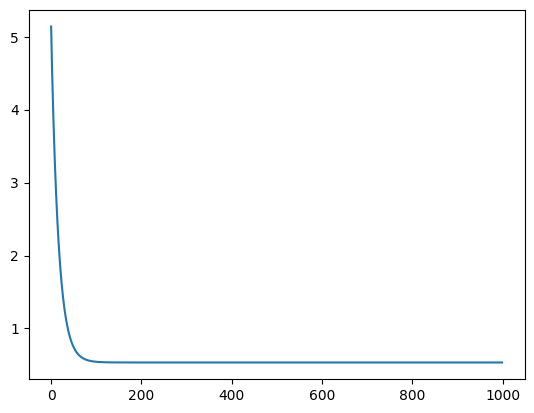

In [ ]:
plt.plot(losses)

In [ ]:
import numpy as np

# ---------------------------
# Data Generator
# ---------------------------
def generate_examples(num=1000):
    W = np.array([[1.0], [-3.0]])   # true weights
    b = 1.0                         # true bias
    x = np.random.randn(num, 2)     # (num,2) features
    noise = np.random.randn(num, 1) # per-sample noise
    y = b + x @ W + noise           # linear relation + noise
    return x, y


# ---------------------------
# Linear Regression Model
# ---------------------------
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()

    def forward_pass(self, x):
        return self.b + x @ self.W

    def compute_loss(self, y_hat, y_true):
        m = y_hat.shape[0]
        return np.sum((y_hat - y_true) ** 2) / (2 * m)

    def backward_pass(self, x, y_true, y_hat):
        m   = y_true.shape[0]
        err = y_hat - y_true          # (m,1)
        dW  = (x.T @ err) / m         # (n,1)
        db  = np.sum(err) / m         # scalar
        return dW, db

    def update_params(self, dW, db, lr):
        self.W -= lr * dW
        self.b -= lr * db

    def train(self, x_train, y_train, iterations=1000, lr=1e-3, log=True):
        losses = []
        log_every = max(iterations // 10, 1)

        for i in range(1, iterations + 1):   # start from 1
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)

            losses.append(loss)

            if log and (i % log_every == 0 or i == 1):
                print(f"Iter: {i}, Loss: {float(loss):.6f}")

        return losses


# ---------------------------
# Training Example
# ---------------------------
x_train, y_train = generate_examples(1000)
model = Model(num_features=2)

losses = model.train(x_train, y_train, iterations=500, lr=3e-3)

print("\nFinal Weights:\n", model.W)
print("Final Bias:\n", model.b)


Iter: 1, Loss: 7.267988
Iter: 50, Loss: 5.572235
Iter: 100, Loss: 4.278380
Iter: 150, Loss: 3.313877
Iter: 200, Loss: 2.594876
Iter: 250, Loss: 2.058880
Iter: 300, Loss: 1.659302
Iter: 350, Loss: 1.361416
Iter: 400, Loss: 1.139339
Iter: 450, Loss: 0.973775
Iter: 500, Loss: 0.850340

Final Weights:
 [[ 0.57237484]
 [-2.28247692]]
Final Bias:
 1.1575101389713898


**Reasoning**:
Predict the target values for the scaled test data and calculate the loss on the test set.

In [ ]:
y_hat_test = model.forward_pass(X_test_scaled)
test_loss = model.compute_loss(y_hat_test, y_test_np)
print(f"Test Loss: {float(test_loss):.4f}")

Test Loss: 0.7367


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target
display(df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
X = df.drop('target', axis=1)
y = df['target']
display(X.head())
display(y.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Reasoning**:
Instantiate the LinearModel class with the number of features from the training data.



In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = LinearModel(num_features=X_train_scaled.shape[1])
losses = model.train(X_train_scaled, y_train_np, iterations=1000, lr=0.001)

Iter: 0, Current loss: 22.6202
Iter: 100, Current loss: 6.6939
Iter: 200, Current loss: 3.8387
Iter: 300, Current loss: 2.8000
Iter: 400, Current loss: 2.2362
Iter: 500, Current loss: 1.8656
Iter: 600, Current loss: 1.5963
Iter: 700, Current loss: 1.3896
Iter: 800, Current loss: 1.2260
Iter: 900, Current loss: 1.0937


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2:.2f}")

R² score: 0.81


In [ ]:
y_train_np = y_train.values.reshape(-1, 1)
losses = model.train(X_train, y_train_np, iterations=1000, lr=0.001)

Iter: 0, Current loss: 477411.5736
Iter: 100, Current loss: nan
Iter: 200, Current loss: nan
Iter: 300, Current loss: nan
Iter: 400, Current loss: nan
Iter: 500, Current loss: nan
Iter: 600, Current loss: nan
Iter: 700, Current loss: nan
Iter: 800, Current loss: nan
Iter: 900, Current loss: nan


/tmp/ipython-input-2343182883.py:14: RuntimeWarning: overflow encountered in square
  loss = np.sum(np.square(y - y_true))
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipython-input-2343182883.py:24: RuntimeWarning: invalid value encountered in subtract
  self.W = self.W - lr * np.reshape(dW, (self.num_features, 1))


In [ ]:
X_test_np = X_test.values
y_test_np = y_test.values.reshape(-1, 1)

X_test_scaled = scaler.transform(X_test_np)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = LinearModel(num_features=X_train_scaled.shape[1])
losses = model.train(X_train_scaled, y_train_np, iterations=1000, lr=0.001)

Iter: 0, Current loss: 15.9245
Iter: 100, Current loss: 5.3346
Iter: 200, Current loss: 2.9316
Iter: 300, Current loss: 2.0502
Iter: 400, Current loss: 1.6254
Iter: 500, Current loss: 1.3786
Iter: 600, Current loss: 1.2141
Iter: 700, Current loss: 1.0938
Iter: 800, Current loss: 1.0003
Iter: 900, Current loss: 0.9244


In [ ]:
y_train_np = y_train.values.reshape(-1, 1)
losses = model.train(X_train, y_train_np, iterations=1000, lr=0.001)

Iter: 0, Current loss: 62225.4386
Iter: 100, Current loss: nan
Iter: 200, Current loss: nan
Iter: 300, Current loss: nan
Iter: 400, Current loss: nan
Iter: 500, Current loss: nan
Iter: 600, Current loss: nan
Iter: 700, Current loss: nan
Iter: 800, Current loss: nan
Iter: 900, Current loss: nan


/tmp/ipython-input-2343182883.py:14: RuntimeWarning: overflow encountered in square
  loss = np.sum(np.square(y - y_true))
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipython-input-2343182883.py:24: RuntimeWarning: invalid value encountered in subtract
  self.W = self.W - lr * np.reshape(dW, (self.num_features, 1))


In [ ]:
y_train_np = y_train.values.reshape(-1, 1)
losses = model.train(X_train, y_train_np, iterations=1000, lr=0.001)

Iter: 0, Current loss: 343365.5627
Iter: 100, Current loss: nan
Iter: 200, Current loss: nan
Iter: 300, Current loss: nan
Iter: 400, Current loss: nan
Iter: 500, Current loss: nan


/tmp/ipython-input-2343182883.py:14: RuntimeWarning: overflow encountered in square
  loss = np.sum(np.square(y - y_true))
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipython-input-2343182883.py:24: RuntimeWarning: invalid value encountered in subtract
  self.W = self.W - lr * np.reshape(dW, (self.num_features, 1))


Iter: 600, Current loss: nan
Iter: 700, Current loss: nan
Iter: 800, Current loss: nan
Iter: 900, Current loss: nan


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = LinearModel(num_features=X_train_scaled.shape[1])
losses = model.train(X_train_scaled, y_train_np, iterations=1000, lr=0.001)

Iter: 0, Current loss: 20.2985
Iter: 100, Current loss: 7.8460
Iter: 200, Current loss: 4.3470
Iter: 300, Current loss: 2.7166
Iter: 400, Current loss: 1.8313
Iter: 500, Current loss: 1.3215
Iter: 600, Current loss: 1.0158
Iter: 700, Current loss: 0.8250
Iter: 800, Current loss: 0.7008
Iter: 900, Current loss: 0.6162


In [ ]:
X_test_np = X_test.values
y_test_np = y_test.values

X_test_scaled = scaler.transform(X_test_np)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
y_hat_test = model.forward_pass(X_test_scaled)
test_loss = model.compute_loss(y_hat_test, y_test_np)
print(f"Test Loss: {float(test_loss):.4f}")

Test Loss: 83.6429


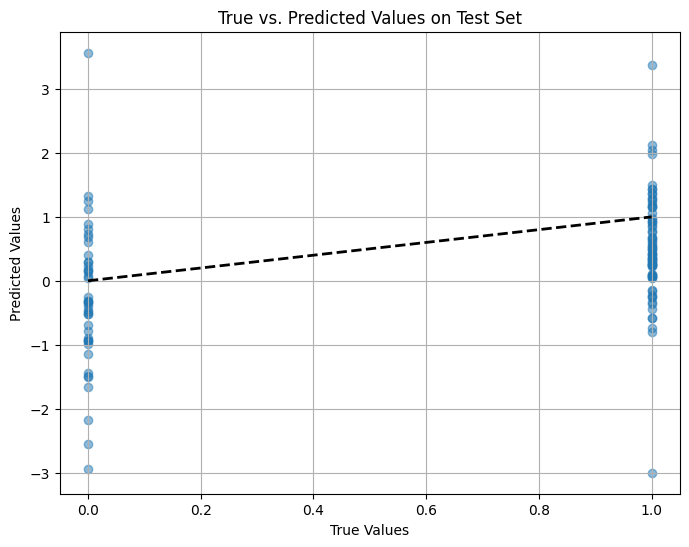

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_hat_test, alpha=0.5)
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'k--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values on Test Set")
plt.grid(True)
plt.show()